In [1]:
import os
import sys

from utils import get_round_loss_score, train_one_epoch_output

sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from natsort import natsorted

import torch
import random

from src.Metamodel.models.depthwiseNet import DepthNet
from src.Metamodel.data.dataloader import create_train_val_loader
from torch.utils.data import random_split, DataLoader

from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, f1_score, classification_report
import torch.backends.cudnn as cudnn

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)
np.random.seed(0)
torch.cuda.manual_seed_all(0)

/home/moonsh/miniconda3/envs/sleep/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATAPATH = "../data/new"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = DepthNet(lengths=30, patch_size=30, in_chans=2, embed_dim=256, norm_layer=None, output_dim=3).to(device)

weightType = "macro" # macro weighted

DepthNet is used...


In [3]:
clients_results_meta = []

MODE = "meta" # "meta", "normal", "random"
MODELPATH = f"../src/FedMeta/model_file_cache/{MODE}"

for client in range(1,11):
    train_result, test_result = get_round_loss_score(DATAPATH, MODELPATH, model, device, client, weightedType=weightType)
    
    clients_results_meta.append([train_result, test_result])

/home/moonsh/Desktop/FedMetaSleep/analysis/utils.py:103: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352465323/work/torch/csrc/utils/tensor_new.cpp:201.)
  auc = auroc(torch.tensor(train_proba), torch.tensor(train_real))


In [4]:
clients_results_normal = []

MODE = "normal" # "meta", "normal", "random"
MODELPATH = f"../src/FedMeta/model_file_cache/{MODE}"

for client in range(1,11):
    train_result, test_result = get_round_loss_score(DATAPATH, MODELPATH, model, device, client, weightedType=weightType)
    
    clients_results_normal.append([train_result, test_result])

In [5]:
clients_results_random = []

MODE = "random" # "meta", "normal", "random"
MODELPATH = f"../src/FedMeta/model_file_cache/{MODE}"

for client in range(1,11):
    train_result, test_result = get_round_loss_score(DATAPATH, MODELPATH, model, device, client, weightedType=weightType)
    
    clients_results_random.append([train_result, test_result])

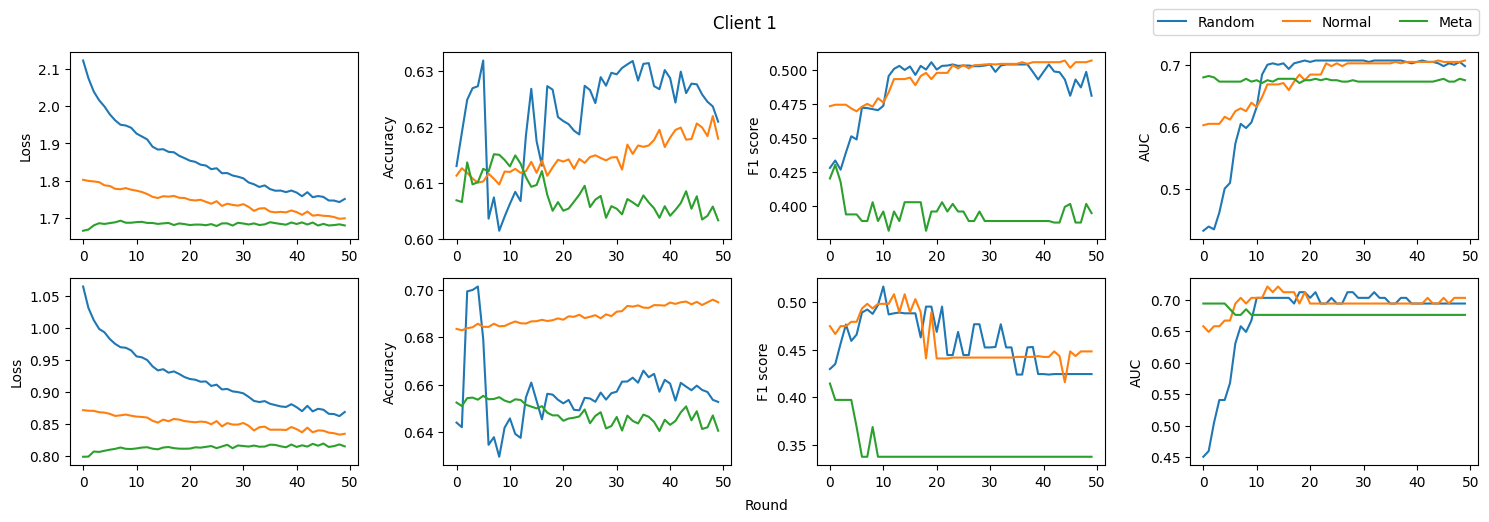

In [37]:
for client_idx in range(10):
    
    fig, ax = plt.subplots(2,4, figsize=(15,5),)

    
    for train_test_idx in range(2):
        
        learning_curve_1 = clients_results_random[client_idx][train_test_idx]["loss"]
        auc_curve_1 = clients_results_random[client_idx][train_test_idx]["auc"]
        f1_curve_1 = clients_results_random[client_idx][train_test_idx]["f1"]
        acc_curve_1 = clients_results_random[client_idx][train_test_idx]["acc"]
        
        learning_curve_2 = clients_results_normal[client_idx][train_test_idx]["loss"]
        auc_curve_2 = clients_results_normal[client_idx][train_test_idx]["auc"]
        f1_curve_2 = clients_results_normal[client_idx][train_test_idx]["f1"]
        acc_curve_2 = clients_results_normal[client_idx][train_test_idx]["acc"]
        
        learning_curve_3 = clients_results_meta[client_idx][train_test_idx]["loss"]
        auc_curve_3 = clients_results_meta[client_idx][train_test_idx]["auc"]
        f1_curve_3 = clients_results_meta[client_idx][train_test_idx]["f1"]
        acc_curve_3 = clients_results_meta[client_idx][train_test_idx]["acc"]
            
        ax[train_test_idx][0].plot(learning_curve_1, label="Random")
        ax[train_test_idx][0].plot(learning_curve_2, label="Normal")
        ax[train_test_idx][0].plot(learning_curve_3, label="Meta")
        
        
        ax[train_test_idx][1].plot(auc_curve_1, label="Random")
        ax[train_test_idx][1].plot(auc_curve_2, label="Normal")
        ax[train_test_idx][1].plot(auc_curve_3, label="Meta")
        
        
        
        ax[train_test_idx][2].plot(f1_curve_1, label="Random")
        ax[train_test_idx][2].plot(f1_curve_2, label="Normal")
        ax[train_test_idx][2].plot(f1_curve_3, label="Meta")
        
        ax[train_test_idx][3].plot(acc_curve_1, label="Random")
        ax[train_test_idx][3].plot(acc_curve_2, label="Normal")
        ax[train_test_idx][3].plot(acc_curve_3, label="Meta")
        
        if train_test_idx == 0:
            fig.suptitle(f"(Train) Client {client_idx+1}")
            
        else:
            fig.suptitle(f"(Test) Client {client_idx+1}")
        
        
        ax[train_test_idx][0].set_ylabel("Loss")
        ax[train_test_idx][1].set_ylabel("Accuracy")
        ax[train_test_idx][2].set_ylabel("F1 score")
        ax[train_test_idx][3].set_ylabel("AUC")
    
    
    plt.suptitle(f"Client {client_idx+1}")
    plt.tight_layout()

    fig.text(0.5, -0.01, "Round",)
    plt.legend(loc=(-0.13, 2.3), ncol=3)
    plt.show()

In [ ]:
best_rounds = []

In [ ]:
for client_idx in range(10):
    
    print(f"Client {client_idx+1}")
    
    for train_test_idx in range(2):
        
        if train_test_idx == 1:
            learning_curve_1 = clients_results_random[client_idx][train_test_idx]["loss"]
            auc_curve_1 = clients_results_random[client_idx][train_test_idx]["auc"]
            f1_curve_1 = clients_results_random[client_idx][train_test_idx]["f1"]
            acc_curve_1 = clients_results_random[client_idx][train_test_idx]["acc"]
            
            learning_curve_2 = clients_results_normal[client_idx][train_test_idx]["loss"]
            auc_curve_2 = clients_results_normal[client_idx][train_test_idx]["auc"]
            f1_curve_2 = clients_results_normal[client_idx][train_test_idx]["f1"]
            acc_curve_2 = clients_results_normal[client_idx][train_test_idx]["acc"]
            
            learning_curve_3 = clients_results_meta[client_idx][train_test_idx]["loss"]
            auc_curve_3 = clients_results_meta[client_idx][train_test_idx]["auc"]
            f1_curve_3 = clients_results_meta[client_idx][train_test_idx]["f1"]
            acc_curve_3 = clients_results_meta[client_idx][train_test_idx]["acc"]
            
            print("Best ACC", np.max(acc_curve_1).round(3), np.max(acc_curve_2).round(3), np.max(acc_curve_3).round(3))
            print("Best ACC Round", np.where(acc_curve_1==np.max(acc_curve_1))[0][0]+1, np.where(acc_curve_2==np.max(acc_curve_2))[0][0]+1, np.where(acc_curve_3==np.max(acc_curve_3))[0][0]+1)
            print("---------")
            print("Best F1", np.max(f1_curve_1).round(3), np.max(f1_curve_2).round(3), np.max(f1_curve_3).round(3))
            print("Best F1 Round", np.where(f1_curve_1==np.max(f1_curve_1))[0][0]+1, np.where(f1_curve_2==np.max(f1_curve_2))[0][0]+1, np.where(f1_curve_3==np.max(f1_curve_3))[0][0]+1)
            print("---------")
            print("Best AUC", np.max(auc_curve_1).round(3), np.max(auc_curve_2).round(3), np.max(auc_curve_3).round(3))
            print("Best AUC Round", np.where(auc_curve_1==np.max(auc_curve_1))[0][0]+1, np.where(auc_curve_2==np.max(auc_curve_2))[0][0]+1, np.where(auc_curve_3==np.max(auc_curve_3))[0][0]+1)
            print("---------")
            
            best_rounds.append([np.where(f1_curve_1==np.max(f1_curve_1))[0][0], np.where(f1_curve_2==np.max(f1_curve_2))[0][0], np.where(f1_curve_3==np.max(f1_curve_3))[0][0]])
            
    print("###########################################")

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(15,5))

for client_idx in range(10):
    
    i = client_idx // 5
    j = client_idx % 5
        
    for train_test_idx in range(2):
        
        if train_test_idx == 1:   
            confusion_matrix = clients_results_random[client_idx][train_test_idx]["confusion_matrix"][best_rounds[client_idx][0]]
            ax = axs[i,j]
            pcm = ax.imshow(confusion_matrix, cmap='viridis', vmin=0, vmax=100)
            # ax[i,j].imshow(confusion_matrix, cmap='viridis')
            ax.set_title(f"Client {client_idx+1}")
            fig.colorbar(pcm, ax=ax, ) #shrink=0.9)
            
            ax.set_xticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_yticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_xlabel("Predicted Label")
            ax.set_ylabel("True Label")
            
            for t_i in range(3):
                for t_j in range(3):
                    ax.text(t_i, t_j+0.07, f"{confusion_matrix[t_i][t_j]}",
                            horizontalalignment="center",
                            color="black" if ((t_i == 1) and (t_j ==1)) else "white",)
            
plt.suptitle("(Random) Best Round Confusion Matrix", fontsize=15) 
plt.tight_layout()   
plt.show()
    

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(15,5))

for client_idx in range(10):
    
    i = client_idx // 5
    j = client_idx % 5
        
    for train_test_idx in range(2):
        
        if train_test_idx == 1:   
            confusion_matrix = clients_results_normal[client_idx][train_test_idx]["confusion_matrix"][best_rounds[client_idx][1]]
            ax = axs[i,j]
            pcm = ax.imshow(confusion_matrix, cmap='viridis', vmin=0, vmax=100)
            # ax[i,j].imshow(confusion_matrix, cmap='viridis')
            ax.set_title(f"Client {client_idx+1}")
            fig.colorbar(pcm, ax=ax, ) #shrink=0.9)
            
            ax.set_xticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_yticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_xlabel("Predicted Label")
            ax.set_ylabel("True Label")
            
            for t_i in range(3):
                for t_j in range(3):
                    ax.text(t_i, t_j+0.07, f"{confusion_matrix[t_i][t_j]}",
                            horizontalalignment="center",
                            color="black" if ((t_i == 1) and (t_j ==1)) else "white",)
            
plt.suptitle("(Normal) Best Round Confusion Matrix", fontsize=15) 
plt.tight_layout()   
plt.show()
    

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(15,5))

for client_idx in range(10):
    
    i = client_idx // 5
    j = client_idx % 5
        
    for train_test_idx in range(2):
        
        if train_test_idx == 1:   
            confusion_matrix = clients_results_meta[client_idx][train_test_idx]["confusion_matrix"][best_rounds[client_idx][2]]
            ax = axs[i,j]
            pcm = ax.imshow(confusion_matrix, cmap='viridis', vmin=0, vmax=100)
            ax.set_title(f"Client {client_idx+1}")
            fig.colorbar(pcm, ax=ax, )
            
            ax.set_xticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_yticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_xlabel("Predicted Label")
            ax.set_ylabel("True Label")
            
            for t_i in range(3):
                for t_j in range(3):
                    ax.text(t_i, t_j+0.07, f"{confusion_matrix[t_i][t_j]}",
                            horizontalalignment="center",
                            color="black" if ((t_i == 1) and (t_j ==1)) else "white",)
            
plt.suptitle("(Meta) Best Round Confusion Matrix", fontsize=15) 
plt.tight_layout()   
plt.show()
    

In [ ]:
one_epoch_train_results_meta = []
one_epoch_train_results_random = []
one_epoch_train_results_normal = []

In [ ]:
for client, best_round in zip(range(1, 11), best_rounds):
    
    best_random_round = best_round[0]
    best_normal_round = best_round[1]
    best_meat_round = best_round[2]
    
    random_train_output, random_test_output = train_one_epoch_output(DATAPATH, MODELPATH, model, device, client, best_random_round,weightedType=weightType)
    normal_train_output, normal_test_output = train_one_epoch_output(DATAPATH, MODELPATH, model, device, client, best_random_round,weightedType=weightType)
    meta_train_output, meta_test_output = train_one_epoch_output(DATAPATH, MODELPATH, model, device, client, best_random_round,weightedType=weightType)
    
    one_epoch_train_results_random.append([random_train_output, random_test_output])
    one_epoch_train_results_normal.append([normal_train_output, normal_test_output])
    one_epoch_train_results_meta.append([meta_train_output, meta_test_output])

In [ ]:
for client_idx in range(10):
    
    print(f"Client {client_idx+1}")
    
    for train_test_idx in range(2):
        
        if train_test_idx == 1:    
            learning_curve_1 = one_epoch_train_results_random[client_idx][train_test_idx]["loss"]
            auc_curve_1 = one_epoch_train_results_random[client_idx][train_test_idx]["auc"]
            f1_curve_1 = one_epoch_train_results_random[client_idx][train_test_idx]["f1"]
            acc_curve_1 = one_epoch_train_results_random[client_idx][train_test_idx]["acc"]
            
            learning_curve_2 = one_epoch_train_results_normal[client_idx][train_test_idx]["loss"]
            auc_curve_2 = one_epoch_train_results_normal[client_idx][train_test_idx]["auc"]
            f1_curve_2 = one_epoch_train_results_normal[client_idx][train_test_idx]["f1"]
            acc_curve_2 = one_epoch_train_results_normal[client_idx][train_test_idx]["acc"]
            
            learning_curve_3 = one_epoch_train_results_meta[client_idx][train_test_idx]["loss"]
            auc_curve_3 = one_epoch_train_results_meta[client_idx][train_test_idx]["auc"]
            f1_curve_3 = one_epoch_train_results_meta[client_idx][train_test_idx]["f1"]
            acc_curve_3 = one_epoch_train_results_meta[client_idx][train_test_idx]["acc"]
            
            print("Best ACC", np.max(acc_curve_1).round(3), np.max(acc_curve_2).round(3), np.max(acc_curve_3).round(3))
            print("Best F1", np.max(f1_curve_1).round(3), np.max(f1_curve_2).round(3), np.max(f1_curve_3).round(3))
            print("Best AUC", np.max(auc_curve_1).round(3), np.max(auc_curve_2).round(3), np.max(auc_curve_3).round(3))
            
    print("###########################################")

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(15,5))

for client_idx in range(10):
    
    i = client_idx // 5
    j = client_idx % 5
        
    for train_test_idx in range(2):
        
        if train_test_idx == 1:   
            confusion_matrix = one_epoch_train_results_random[client_idx][train_test_idx]["confusion_matrix"][0]
            
            ax = axs[i,j]
            pcm = ax.imshow(confusion_matrix, cmap='viridis', vmin=0, vmax=100)
            # ax[i,j].imshow(confusion_matrix, cmap='viridis')
            ax.set_title(f"Client {client_idx+1}")
            fig.colorbar(pcm, ax=ax, ) #shrink=0.9)
            
            ax.set_xticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_yticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_xlabel("Predicted Label")
            ax.set_ylabel("True Label")
            
            for t_i in range(3):
                for t_j in range(3):
                    ax.text(t_i, t_j+0.07, f"{confusion_matrix[t_i][t_j]}",
                            horizontalalignment="center",
                            color="black" if ((t_i == 1) and (t_j ==1)) else "white",)
            
plt.suptitle("(Random) After Training one epoch", fontsize=15)            
plt.tight_layout()   
plt.show()

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(15,5))

for client_idx in range(10):
    
    i = client_idx // 5
    j = client_idx % 5
        
    for train_test_idx in range(2):
        
        if train_test_idx == 1:   
            confusion_matrix = one_epoch_train_results_meta[client_idx][train_test_idx]["confusion_matrix"][0]
            
            ax = axs[i,j]
            pcm = ax.imshow(confusion_matrix, cmap='viridis', vmin=0, vmax=100)
            # ax[i,j].imshow(confusion_matrix, cmap='viridis')
            ax.set_title(f"Client {client_idx+1}")
            fig.colorbar(pcm, ax=ax, ) #shrink=0.9)
            
            ax.set_xticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_yticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_xlabel("Predicted Label")
            ax.set_ylabel("True Label")
            
            for t_i in range(3):
                for t_j in range(3):
                    ax.text(t_i, t_j+0.07, f"{confusion_matrix[t_i][t_j]}",
                            horizontalalignment="center",
                            color="black" if ((t_i == 1) and (t_j ==1)) else "white",)
            
plt.suptitle("(Meta) After Training one epoch", fontsize=15)            
plt.tight_layout()   
plt.show()

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(15,5))

for client_idx in range(10):
    
    i = client_idx // 5
    j = client_idx % 5
        
    for train_test_idx in range(2):
        
        if train_test_idx == 1:   
            confusion_matrix = one_epoch_train_results_normal[client_idx][train_test_idx]["confusion_matrix"][0]
            
            ax = axs[i,j]
            pcm = ax.imshow(confusion_matrix, cmap='viridis', vmin=0, vmax=100)
            # ax[i,j].imshow(confusion_matrix, cmap='viridis')
            ax.set_title(f"Client {client_idx+1}")
            fig.colorbar(pcm, ax=ax, ) #shrink=0.9)
            
            ax.set_xticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_yticks(np.arange(3), ["wake", "NREM", "REM"])
            ax.set_xlabel("Predicted Label")
            ax.set_ylabel("True Label")
            
            for t_i in range(3):
                for t_j in range(3):
                    ax.text(t_i, t_j+0.07, f"{confusion_matrix[t_i][t_j]}",
                            horizontalalignment="center",
                            color="black" if ((t_i == 1) and (t_j ==1)) else "white",)
            
plt.suptitle("(Normal) After Training one epoch", fontsize=15)            
plt.tight_layout()   
plt.show()